In [121]:
import numpy as np, sympy as smp, matplotlib.pyplot as plt
from matplotlib import animation

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

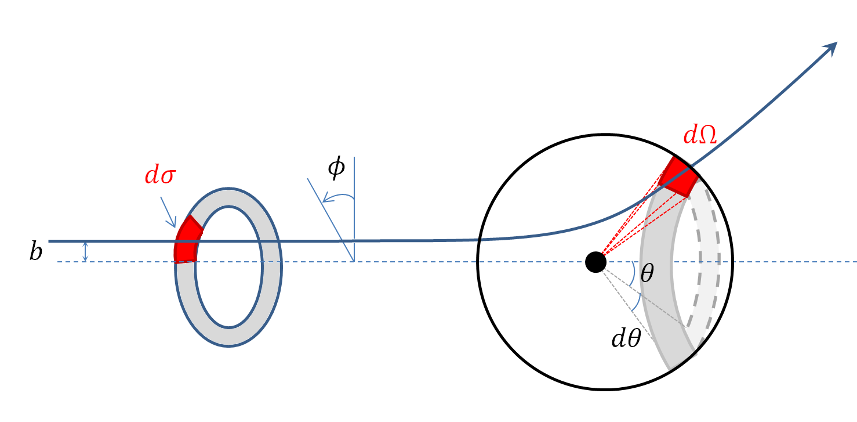

In [122]:
from IPython.display import Image
Image(filename = r'..\Images\scattering.png', width = 500, height = 500)

An incident particle scatters off something, and leaves with a solid angle $d\Omega$. Also, $d\sigma\propto d\Omega$ is related through the Differential Scattering $$d\sigma=D\theta\,d\Omega$$ which gives us $$D\theta=\frac{d\sigma}{d\Omega}$$ We relate this to something like the Density $\displaystyle\rho=\frac{dm}{d\tau}$ which tells us how much there is per volume $d\tau$. So this $D\theta$ tells us how much $d\sigma$ there is per solid scattering angle $d\Omega$.

In **Quantum Theory,** the incident particle is a photon with scatters off an electron *(Compton Scattering)*, described by $$\frac{d\sigma}{d\Omega}=\frac{r_e^2}2\frac{1+\cos^2\theta}{1+\alpha(1-\cos\theta)^2}\Bigg\{1+\frac{\alpha^2(1-\cos\theta)^2}{(1+\cos^2\theta)(1+\alpha(1-\cos\theta))}\Bigg\}$$ where 

- $r_e=2.818e-15$ m is the Classical electron radius, and
- $\displaystyle\alpha=\frac{E}{m_ec^2}$ where $E$ is the incoming photon energy and $m_e$ is the electron mass. 

# Section 1:

We wanna find the Probability that a photon scatters at an angle $\theta$, which means we gotta find 
- **Part A:** $d\sigma/d\theta$,
- **Part B:** $\sigma$ 
- **Part C:** And use them to find the Probability Density $f(\theta)$.

## Part A:

Since $\sigma=\int d\sigma$, which is $$\begin{align}\sigma=\int\frac{d\sigma}{d\Omega}d\Omega \\ =\int_0^{2\pi}\int_0^\pi\frac{d\sigma}{d\Omega}\sin\theta\,d\theta d\phi \\ =\int_0^\pi\Bigg(2\pi\frac{d\sigma}{d\Omega}\sin\theta\Bigg)\,d\theta\end{align}$$ We can identify the term in parantheses as $d\sigma/d\theta$: $$\frac{d\sigma}{d\theta}=2\pi\frac{d\sigma}{d\Omega}\sin\theta$$

In [123]:
theta, alpha = smp.symbols(r'\theta \alpha', real = True, positive = True)

ds_dO = smp.Rational(1, 2) * (1 + smp.cos(theta) ** 2) / (1 + alpha * (1 - smp.cos(theta))) ** 2 * \
            (1 + alpha ** 2 * (1 - smp.cos(theta)) ** 2 / ((1 + smp.cos(theta) ** 2) * (1 + alpha * (1 - smp.cos(theta)))))

ds_dt = 2 * smp.pi * ds_dO * smp.sin(theta)
ds_dt.simplify()

pi*(-\alpha**2*(cos(\theta) - 1)**2 + (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*sin(\theta)/(\alpha*(cos(\theta) - 1) - 1)**3

## Part B:

We gotta compute $\displaystyle\sigma=\int_0^\pi\frac{d\sigma}{d\theta}d\theta$:

In [124]:
s = smp.integrate(ds_dt, (theta, 0, smp.pi))
s = s.simplify().simplify()

s

pi*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha + (4*\alpha**4 - 4*\alpha**3 - 15*\alpha**2 - 10*\alpha - 2)*log(2*\alpha + 1))/(\alpha**3*(4*\alpha**2 + 4*\alpha + 1))

## Part C:

If the incoming particle Flux is uniform, then the Probability $\displaystyle P(\theta)=f(\theta)\,d\theta\propto d\sigma=\frac{d\sigma}{d\theta}d\theta$ so we can write $$f(\theta)=C\frac{d\sigma}{d\theta}$$ Now we have to enforce $\int_0^\pi f(\theta)\,d\theta=1$ so $$1=\int_0^\pi f(\theta)\,d\theta=C\int_0^\pi\frac{d\sigma}{d\theta}=C\sigma$$ and thus $C=\sigma^{-1}$ and $$f(\theta)=\frac 1\sigma\frac{d\sigma}{d\theta}$$

In [125]:
pdf_theta = ds_dt / s
pdf_theta = pdf_theta.simplify()

pdf_theta

\alpha**3*(-\alpha**2*(cos(\theta) - 1)**2 + (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*(4*\alpha**2 + 4*\alpha + 1)*sin(\theta)/((\alpha*(cos(\theta) - 1) - 1)**3*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha - (-4*\alpha**4 + 4*\alpha**3 + 15*\alpha**2 + 10*\alpha + 2)*log(2*\alpha + 1)))

We can also get it this over the whole sphere as $$g(\theta,\phi)=\frac 1\sigma\frac{d\sigma}{d\Omega}$$

In [126]:
pdf_Omega = ds_dO / s
pdf_Omega = pdf_Omega.simplify()

pdf_Omega

\alpha**3*(-\alpha**2*(cos(\theta) - 1)**2 + (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*(4*\alpha**2 + 4*\alpha + 1)/(2*pi*(\alpha*(cos(\theta) - 1) - 1)**3*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha - (-4*\alpha**4 + 4*\alpha**3 + 15*\alpha**2 + 10*\alpha + 2)*log(2*\alpha + 1)))

Let's turn these into numerical functions for plotting them:

In [127]:
pdf_theta_f = smp.lambdify([theta, alpha], pdf_theta)
pdf_Omega_f = smp.lambdify([theta, alpha], pdf_Omega)

theta_values = np.linspace(0, np.pi, 1000)

pdf_tv = pdf_theta_f(theta_values, 2)
pdf_Ov = pdf_Omega_f(theta_values, 2)

Let's do a simple polar plot for $\alpha=2$ where the angle represents the Polar Angle $\theta$ and the Radius Vector represnts the probability density:

Text(0.5, 1.0, '$g(\\theta,\\phi)$')

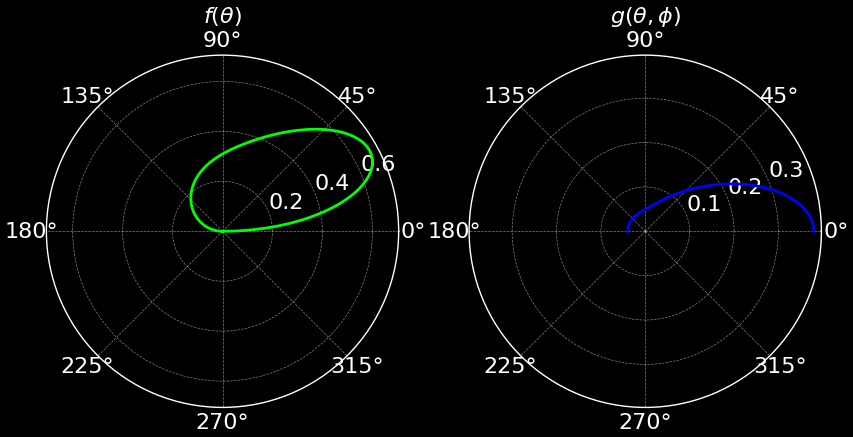

In [128]:
fig, axes = plt.subplots(1, 2, figsize = (10, 10), subplot_kw = {'projection': 'polar'})

axes[0].plot(theta_values, pdf_tv, color = 'lime')
axes[0].set_title(r'$f(\theta)$')

axes[1].plot(theta_values, pdf_Ov, color = 'blue')
axes[1].set_title(r'$g(\theta,\phi)$')

Let's get the $\theta$ intervals from 0 to $\pi$, and some different values of $\alpha$ to make an animation:

In [129]:
theta_values = np.linspace(0, np.pi, 1000)
alpha_values = 10.0 ** np.linspace(-3, 4, 300)

pdf_values = [pdf_theta_f(theta_values, alpha) for alpha in alpha_values]

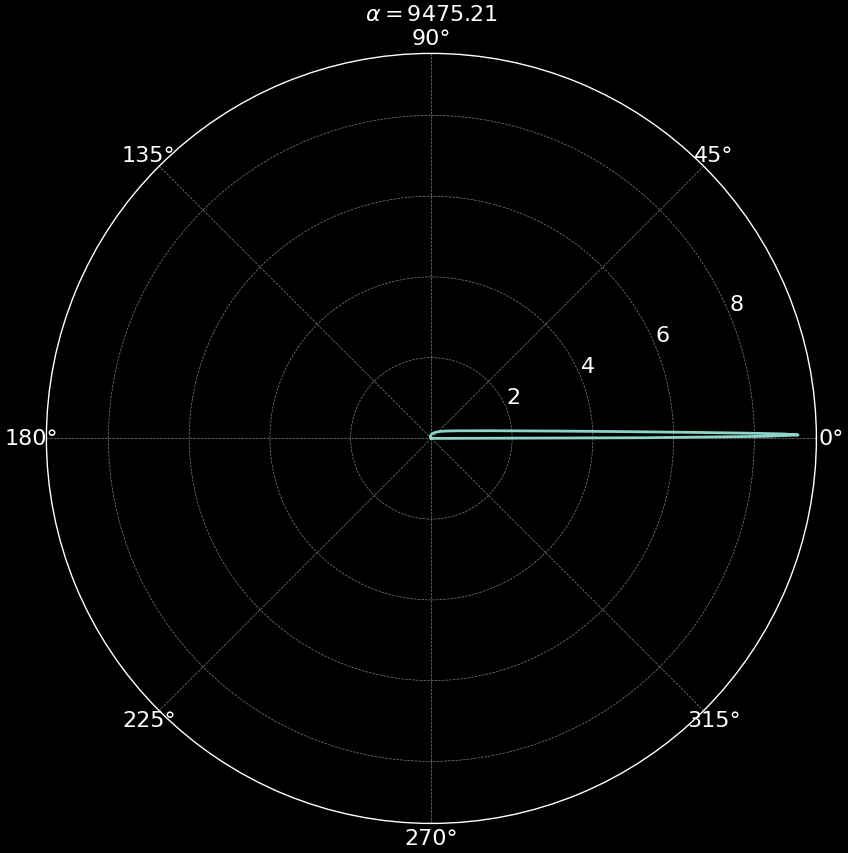

In [130]:
fig, ax = plt.subplots( figsize = (10, 10), subplot_kw = {'projection': 'polar'})
ln, = plt.plot([], [])

def animate(i):
    ax.clear()
    ax.plot(theta_values, pdf_values[i])

    ax.set_title(r'$\alpha=$' + f'{alpha_values[i]:.2f}')

ani = animation.FuncAnimation(fig, animate, frames = 299, interval = 50)
ani.save('..\Outputs\scattering1.gif', writer = 'pillow', fps = 30, dpi = 100)

# Section 2:

Let's get the probability density function of 
- **Part A:** Outgoing photon energy $\displaystyle\epsilon=\frac E{1+\alpha(1-\cos\theta)}$ so we need $f(\epsilon)$.
- **Part B:** Outgoing electron energy $\displaystyle T=E-\epsilon=\frac{E\alpha(1-\cos\theta)}{1+\alpha(1-\cos\theta)}$ so we need $f(T)$.

## Part A:

We know that $$f(\epsilon)=\frac 1\sigma\frac{d\sigma}{d\epsilon}$$ which is $$f(\epsilon)=\frac 1\sigma\frac{d\sigma}{d\epsilon}\Bigg(\frac{d\epsilon}{d\theta}\Bigg)^{-1}$$ We need to find all of these variables in terms of $\epsilon$.

In [131]:
E, epsilon, alpha, T, theta = smp.symbols(r'E \epsilon \alpha T \theta', real = True, positive = True)

epsilon_expr = E / (1 + alpha * (1 - smp.cos(theta)))
epsilon_expr

E/(\alpha*(1 - cos(\theta)) + 1)

In [132]:
theta_expr = smp.solve(epsilon - epsilon_expr, theta)[1]
theta_expr

acos((-E + \alpha*\epsilon + \epsilon)/(\alpha*\epsilon))

In [133]:
pdf_epsilon = 1 / s * ds_dt / smp.diff(epsilon_expr, theta)
pdf_epsilon

-2*\alpha**2*(\alpha**2*(1 - cos(\theta))**2/((\alpha*(1 - cos(\theta)) + 1)*(cos(\theta)**2 + 1)) + 1)*(cos(\theta)**2/2 + 1/2)*(4*\alpha**2 + 4*\alpha + 1)/(E*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha + (4*\alpha**4 - 4*\alpha**3 - 15*\alpha**2 - 10*\alpha - 2)*log(2*\alpha + 1)))

In [134]:
pdf_epsilon = pdf_epsilon.subs(theta, theta_expr).simplify()
pdf_epsilon

-(E*(\alpha**2*\epsilon**2 + (-E + \alpha*\epsilon + \epsilon)**2) + \alpha**2*\epsilon*(E - \epsilon)**2)*(4*\alpha**2 + 4*\alpha + 1)/(E**2*\epsilon**2*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha - (-4*\alpha**4 + 4*\alpha**3 + 15*\alpha**2 + 10*\alpha + 2)*log(2*\alpha + 1)))

This should be normalized to 1. We can perform a consistency check by integrating over all $\epsilon$. Examining the expression $$\epsilon=\frac E{1+\alpha(1-\cos\theta)}$$ we see that at $\theta=0$ we have $\epsilon=E$, and at $\theta=\pi$ we have $\displaystyle\epsilon=\frac E{1+2\alpha}$.

In [135]:
smp.integrate(pdf_epsilon, (epsilon, E, E / (1 + 2 * alpha))).simplify()

1

## Part B:

We know that $$f(T)=\frac 1\sigma\frac{d\sigma}{dT}$$ which is $$f(T)=\frac 1\sigma\frac{d\sigma}{d\theta}\Bigg(\frac{dT}{d\theta}\Bigg)^{-1}$$
We need to find all of these variables in terms of $\epsilon$.

In [136]:
T_expr = E * alpha * (1 - smp.cos(theta)) / (1 + alpha * (1 - smp.cos(theta)))
theta_expr = smp.solve(T - T_expr, theta)[1]

pdf_T = 1 / s * ds_dt / smp.diff(T_expr, theta)
pdf_T = pdf_T.subs(theta, theta_expr).simplify()

pdf_T

(\alpha**2*(E - T)*(-E*\alpha + T*\alpha + T + \alpha*(E - T))**2 + (\alpha**2*(E - T)**2 + (-E*\alpha + T*\alpha + T)**2)*(-E*\alpha + E + T*\alpha + \alpha*(E - T)))*(4*\alpha**2 + 4*\alpha + 1)/(E*(-E + T)**2*(-E*\alpha + E + T*\alpha + \alpha*(E - T))*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha - (-4*\alpha**4 + 4*\alpha**3 + 15*\alpha**2 + 10*\alpha + 2)*log(2*\alpha + 1)))

Again, we can check if its normalized; examining $$T=\frac{E\alpha(1-\cos\theta)}{1+\alpha(1-\cos\theta)}$$ we see that at $\theta=0$ we have $T=0$, and at $\theta=\pi$ we have $\displaystyle T=\frac{2E\alpha}{1+2\alpha}$.

In [137]:
smp.integrate(pdf_T, (T, 0, 2 * E * alpha / (1 + 2 * alpha))).simplify()

1

Let's see how these probability densities change:

In [138]:
pdf_epsilon_f = smp.lambdify([epsilon, E, alpha], pdf_epsilon)
pdf_T_f = smp.lambdify([T, E, alpha], pdf_T)

Let's take a sample $\alpha=2$:

In [139]:
m = 0.511
alpha_test = 50 # CHANGE THIS AS YOU PLEASE
E = alpha_test * m

epsilon = np.linspace(E / (1 + 2 * alpha_test), E, 1000)
T = np.linspace(0, 2 * E * alpha_test / (1 + 2 * alpha_test), 1000)

Text(0, 0.5, 'Probability Density $f$')

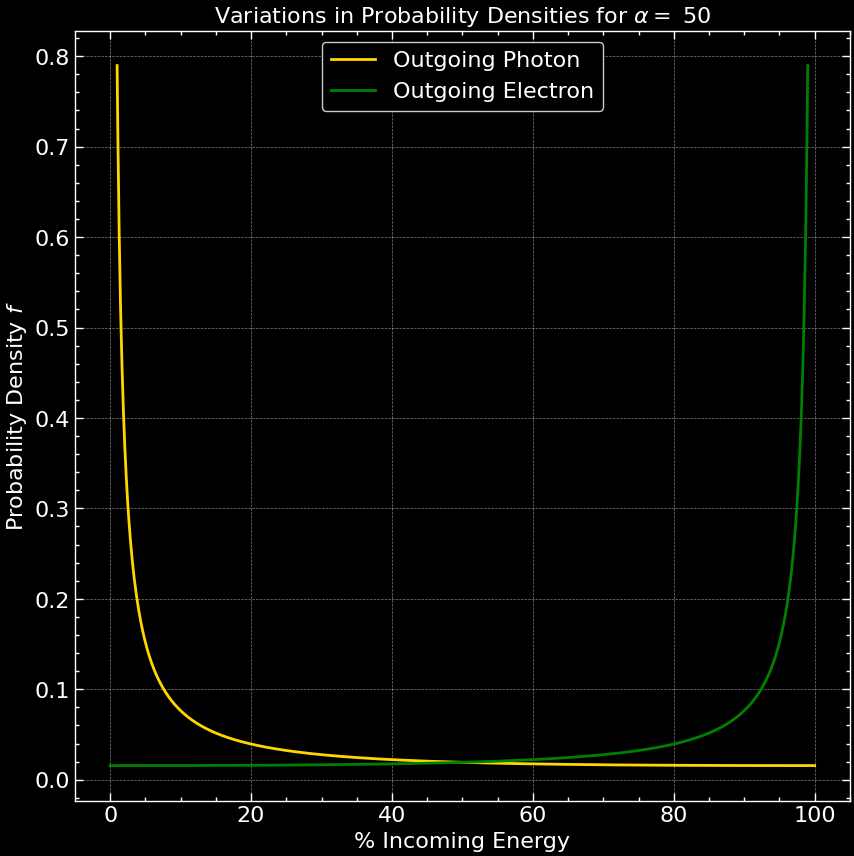

In [140]:
plt.figure(figsize = (10, 10))
plt.plot(100 * epsilon / E, -pdf_epsilon_f(epsilon, E, alpha_test), color = 'gold', label = 'Outgoing Photon')
plt.plot(100 * T / E, pdf_T_f(T, E, alpha_test), color = 'green', label = 'Outgoing Electron')

plt.legend(loc = 'upper center')
plt.title(r'Variations in Probability Densities for $\alpha=$ {}'.format(alpha_test))
plt.xlabel(r'% Incoming Energy')
plt.ylabel(r'Probability Density $f$')

Let's get arrays of probability densities for many different $\alpha$ values and make an animation:

In [141]:
alpha_values = 10.0 ** np.linspace(-3, 4, 300)

epsilon_values = [np.linspace(alpha * m / (1 + 2 * alpha), alpha * m, 1000) for alpha in alpha_values]
T_values = [np.linspace(0, 2 * alpha ** 2 * m / (1 + 2 * alpha), 1000) for alpha in alpha_values]

pdf_values_epsilon = [-pdf_epsilon_f(epsilon, alpha * m, alpha) for (alpha, epsilon) in zip(alpha_values, epsilon_values)]
pdf_values_T = [pdf_T_f(T, alpha * m, alpha) for (alpha, T) in zip(alpha_values, T_values)]

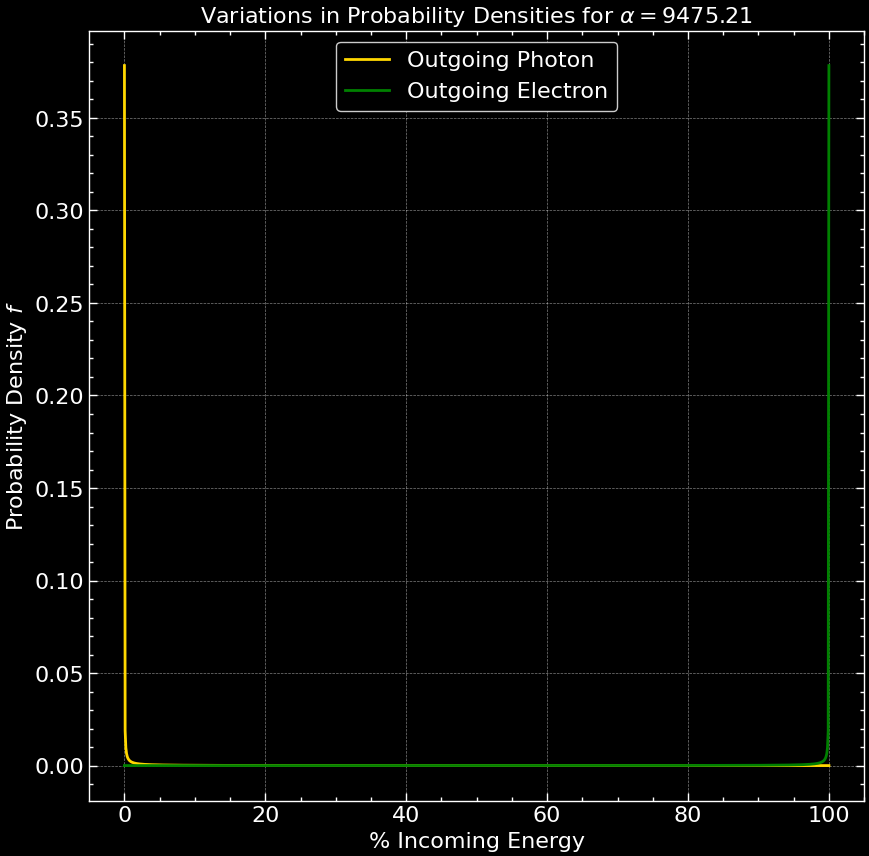

In [143]:
fig, ax = plt.subplots(figsize = (10, 10))

def animate(i):
    alpha = alpha_values[i]; epsilon = epsilon_values[i]; T = T_values[i]
    E = m * alpha

    ax.clear()
    ax.plot(100 * epsilon / E, -pdf_epsilon_f(epsilon, E, alpha), color = 'gold', label = 'Outgoing Photon')
    ax.plot(100 * T / E, pdf_T_f(T, E, alpha), color = 'green', label = 'Outgoing Electron')

    ax.legend(loc = 'upper center')
    ax.set_title(r'Variations in Probability Densities for $\alpha=$' + f'{alpha:.2f}')
    ax.set_xlabel(r'% Incoming Energy')
    ax.set_ylabel(r'Probability Density $f$')

ani = animation.FuncAnimation(fig, animate, frames = 299, interval = 50)
ani.save('..\Outputs\scattering2.gif', writer = 'pillow', fps = 30, dpi = 100)